In [2]:
import pandas as pd
import pathlib

In [3]:
# current notebook directory
data_path = pathlib.Path().resolve().parent / "data"

df = pd.read_parquet(data_path / "valenbici_2025.parquet")

In [4]:
df.head()

,Direccion,Numero,Activo,Bicis_disponibles,Espacios_libres,Espacios_totales,ticket,fecha_actualizacion,geo_shape,geo_point_2d,update_jcd,filename,snapshot_ts
0,Plaza Poeta Llorente,5,True,2,13,15,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",2024-12-31 23:49:21+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03
1,Xátiva - Bailén (Estación del Norte),17,True,0,0,30,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3772593951806123, 39.46746...","39.46746831099193,-0.3772593951806123",2024-12-31 23:46:17+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03
2,Plaza de Tetuán,9,True,4,20,25,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3699303648826442, 39.47435...","39.47435533016869,-0.3699303648826442",2024-12-31 23:49:31+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03
3,Quart - Fernando el Católico,20,True,8,8,16,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3878474253260651, 39.47503...","39.47503434099054,-0.3878474253260651",2024-12-31 23:44:49+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03
4,Escultor José Capuz - Oriente,43,True,13,7,20,False,2024-12-31 23:50:08,"{""coordinates"": [-0.36115334583643566, 39.4594...","39.459477276259406,-0.36115334583643566",2024-12-31 23:47:27+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365543 entries, 0 to 4365542
Data columns (total 13 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Direccion            object             
 1   Numero               int64              
 2   Activo               bool               
 3   Bicis_disponibles    int64              
 4   Espacios_libres      int64              
 5   Espacios_totales     int64              
 6   ticket               bool               
 7   fecha_actualizacion  datetime64[us]     
 8   geo_shape            object             
 9   geo_point_2d         object             
 10  update_jcd           datetime64[us, UTC]
 11  filename             object             
 12  snapshot_ts          datetime64[us]     
dtypes: bool(2), datetime64[us, UTC](1), datetime64[us](2), int64(4), object(4)
memory usage: 374.7+ MB


In [6]:
df["Year"] = df["fecha_actualizacion"].dt.year
df["Month"] = df["fecha_actualizacion"].dt.month
df["Day"] = df["fecha_actualizacion"].dt.day
df["Hour"] = df["fecha_actualizacion"].dt.hour
df["Minute"] = df["fecha_actualizacion"].dt.minute

In [7]:
fechas = df["fecha_actualizacion"].dt.strftime("%Y-%m-%d--%H:%M")

df["unique_id"] = df["Direccion"].str.cat(fechas, sep="-")

In [8]:
df.head()

,Direccion,Numero,Activo,Bicis_disponibles,Espacios_libres,Espacios_totales,ticket,fecha_actualizacion,geo_shape,geo_point_2d,update_jcd,filename,snapshot_ts,Year,Month,Day,Hour,Minute,unique_id
0,Plaza Poeta Llorente,5,True,2,13,15,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",2024-12-31 23:49:21+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03,2024,12,31,23,50,Plaza Poeta Llorente-2024-12-31--23:50
1,Xátiva - Bailén (Estación del Norte),17,True,0,0,30,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3772593951806123, 39.46746...","39.46746831099193,-0.3772593951806123",2024-12-31 23:46:17+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03,2024,12,31,23,50,Xátiva - Bailén (Estación del Norte)-2024-12-3...
2,Plaza de Tetuán,9,True,4,20,25,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3699303648826442, 39.47435...","39.47435533016869,-0.3699303648826442",2024-12-31 23:49:31+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03,2024,12,31,23,50,Plaza de Tetuán-2024-12-31--23:50
3,Quart - Fernando el Católico,20,True,8,8,16,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3878474253260651, 39.47503...","39.47503434099054,-0.3878474253260651",2024-12-31 23:44:49+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03,2024,12,31,23,50,Quart - Fernando el Católico-2024-12-31--23:50
4,Escultor José Capuz - Oriente,43,True,13,7,20,False,2024-12-31 23:50:08,"{""coordinates"": [-0.36115334583643566, 39.4594...","39.459477276259406,-0.36115334583643566",2024-12-31 23:47:27+00:00,extracted_2025/valenbici_01-01-2025_00-00-03.csv,2025-01-01 00:00:03,2024,12,31,23,50,Escultor José Capuz - Oriente-2024-12-31--23:50


In [9]:
df["bikes_percent"] = df["Bicis_disponibles"] / df["Espacios_totales"] * 100

In [10]:
def split_train_test(df, test_days=7, train_days=30, date_col="fecha_actualizacion"):
    now = df[date_col].max()
    test_start_date = now - pd.Timedelta(days=test_days)
    test = df[df[date_col] >= test_start_date]
    train_start_date = test_start_date - pd.DateOffset(days=train_days)
    train = df[(df[date_col] >= train_start_date) & (df[date_col] < test_start_date)]
    return train, test


train, test = split_train_test(df)

In [11]:
test

,Direccion,Numero,Activo,Bicis_disponibles,Espacios_libres,Espacios_totales,ticket,fecha_actualizacion,geo_shape,geo_point_2d,update_jcd,filename,snapshot_ts,Year,Month,Day,Hour,Minute,unique_id,bikes_percent
1541085,Plaza de los Fueros - Conde Trenor,36,True,13,11,25,False,2025-06-09 23:49:48,"{""coordinates"": [-0.3754363798581042, 39.47907...","39.479072348860946,-0.3754363798581042",2025-06-09 23:44:56+00:00,extracted_2025/valenbici_10-06-2025_00-00-22.csv,2025-06-10 00:00:22,2025,6,9,23,49,Plaza de los Fueros - Conde Trenor-2025-06-09-...,52.000000
1541086,Av. Puerto - José Aguilar,68,True,13,7,20,False,2025-06-09 23:49:48,"{""coordinates"": [-0.3417332778594022, 39.46280...","39.46280327868023,-0.3417332778594022",2025-06-09 23:45:54+00:00,extracted_2025/valenbici_10-06-2025_00-00-22.csv,2025-06-10 00:00:22,2025,6,9,23,49,Av. Puerto - José Aguilar-2025-06-09--23:49,65.000000
1541087,"Alberique, 18 (Abastos)",25,True,6,17,23,False,2025-06-09 23:49:48,"{""coordinates"": [-0.38861043334080225, 39.4677...","39.46772931656263,-0.38861043334080225",2025-06-09 23:40:41+00:00,extracted_2025/valenbici_10-06-2025_00-00-22.csv,2025-06-10 00:00:22,2025,6,9,23,49,"Alberique, 18 (Abastos)-2025-06-09--23:49",26.086957
1541088,Av Puerto 19 (Telefónica),63,True,15,5,20,False,2025-06-09 23:49:48,"{""coordinates"": [-0.358414330727018, 39.467779...","39.46777930285978,-0.358414330727018",2025-06-09 23:46:28+00:00,extracted_2025/valenbici_10-06-2025_00-00-22.csv,2025-06-10 00:00:22,2025,6,9,23,49,Av Puerto 19 (Telefónica)-2025-06-09--23:49,75.000000
1541089,República Argentina - Campoamor,75,True,17,8,25,False,2025-06-09 23:49:48,"{""coordinates"": [-0.35170130420295115, 39.4721...","39.472113313853896,-0.35170130420295115",2025-06-09 23:40:29+00:00,extracted_2025/valenbici_10-06-2025_00-00-22.csv,2025-06-10 00:00:22,2025,6,9,23,49,República Argentina - Campoamor-2025-06-09--23:49,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617519,Dels Gremis - Campos Crespo,252,True,12,8,20,False,2025-06-16 23:49:47,"{""coordinates"": [-0.40357449843597065, 39.4502...","39.45028826570709,-0.40357449843597065",2025-06-16 23:37:37+00:00,extracted_2025/valenbici_17-06-2025_00-00-02.csv,2025-06-17 00:00:02,2025,6,16,23,49,Dels Gremis - Campos Crespo-2025-06-16--23:49,60.000000
2617520,Levante U.D. - Ecuador,237,True,6,9,15,False,2025-06-16 23:49:47,"{""coordinates"": [-0.39103842063587124, 39.4947...","39.494758407776374,-0.39103842063587124",2025-06-16 23:42:49+00:00,extracted_2025/valenbici_17-06-2025_00-00-02.csv,2025-06-17 00:00:02,2025,6,16,23,49,Levante U.D. - Ecuador-2025-06-16--23:49,40.000000
2617521,La Vall d'Albaida - Corts Valencianes,241,True,3,12,15,False,2025-06-16 23:49:47,"{""coordinates"": [-0.4018904586642118, 39.49297...","39.49297840711153,-0.4018904586642118",2025-06-16 23:38:24+00:00,extracted_2025/valenbici_17-06-2025_00-00-02.csv,2025-06-17 00:00:02,2025,6,16,23,49,La Vall d'Albaida - Corts Valencianes-2025-06-...,20.000000
2617522,Nueve de Octubre - Cieza,245,True,2,18,20,False,2025-06-16 23:49:47,"{""coordinates"": [-0.40527029936434095, 39.4721...","39.47213024806011,-0.40527029936434095",2025-06-16 23:38:06+00:00,extracted_2025/valenbici_17-06-2025_00-00-02.csv,2025-06-17 00:00:02,2025,6,16,23,49,Nueve de Octubre - Cieza-2025-06-16--23:49,10.000000


In [12]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
)
import numpy as np

In [13]:
filtered_series = test["unique_id"].str.contains("República Argentina - Campoamor")
filtered_test = test[filtered_series]

In [14]:
# plot series with plotly
import plotly.express as px

fig = px.line(
    filtered_test,
    x="fecha_actualizacion",
    y=["bikes_percent", "Bicis_disponibles"],
    title="Bikes Availability Over Time",
    labels={"fecha_actualizacion": "Date", "value": "Percentage / Count"},
)
fig.show()

In [15]:
example_points = df["Numero"][:1]  # Example points to visualize
# df_example = df.query("Numero == @example_point")
df = df.query("Numero in @example_points")
df["ds"] = df["fecha_actualizacion"].dt.round("min")
df["y"] = df["bikes_percent"] + 1
df["unique_id"] = df["Numero"]
ex_train, ex_test = split_train_test(df, test_days=7, train_days=200)

In [16]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from utilsforecast.plotting import plot_series
import logging
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

In [17]:
nixtla_cols = ["unique_id", "ds", "y"]
horizon = len(ex_test['y'])
models = [NBEATS(input_size=10 * horizon, h=horizon, max_steps=500, enable_progress_bar=False),
          NHITS(input_size=10 * horizon, h=horizon, max_steps=500, enable_progress_bar=False)]
nf = NeuralForecast(models=models, freq='15min')
nf.fit(df=ex_train[nixtla_cols])
Y_hat_df = nf.predict()

Seed set to 1
Seed set to 1


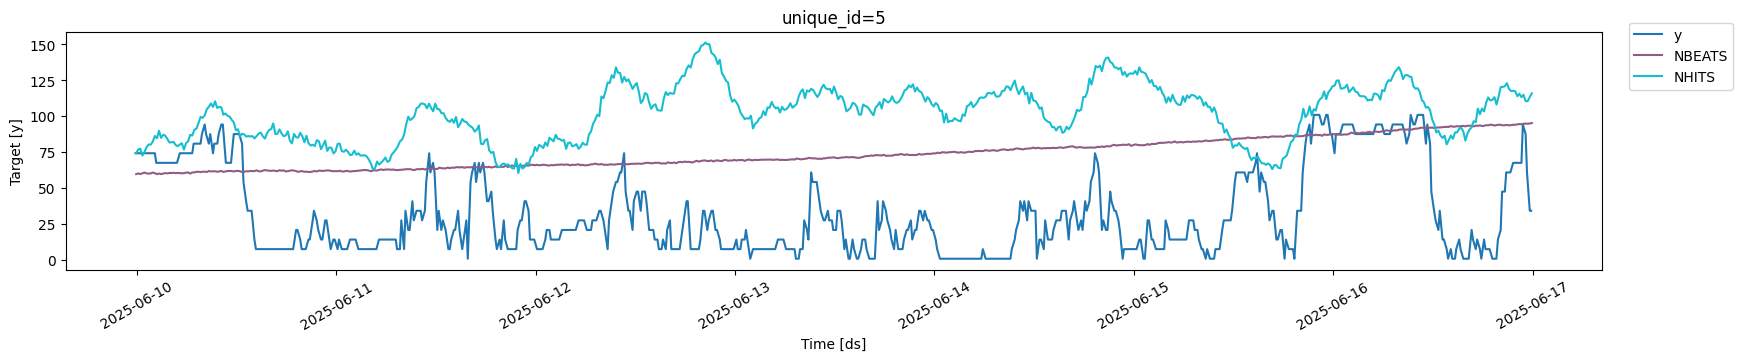

In [18]:
plot_series(ex_test, Y_hat_df)

In [19]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import DistributionLoss  # or MQLoss/IQLoss

H = 96 * 7                         # forecasting one day ahead
INPUT = 4 * H                   # context: 7 days
FREQ = '15min'

loss = DistributionLoss(distribution='StudentT', level=[80, 90])

model = NHITS(
    h=H,
    input_size=INPUT,
    loss=loss,
    n_freq_downsample=[168, 24, 1],
    n_pool_kernel_size=[2, 2, 2],
    scaler_type='identity',      # because we already put y in [0,1]
    learning_rate=1e-3,
    max_steps=1000,
    early_stop_patience_steps=5,
    val_check_steps=50,
)

# df is your long-format DataFrame, already scaled
# futr_df contains the same rows with the engineered calendar features
fcst = NeuralForecast(models=[model], freq=FREQ)
fcst.fit(df=ex_train[nixtla_cols], val_size=H)   # one-week validation

# Generate the correct future dataframe
future_df = fcst.make_future_dataframe(df=ex_train[nixtla_cols])

pred = fcst.predict(futr_df=future_df)


Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

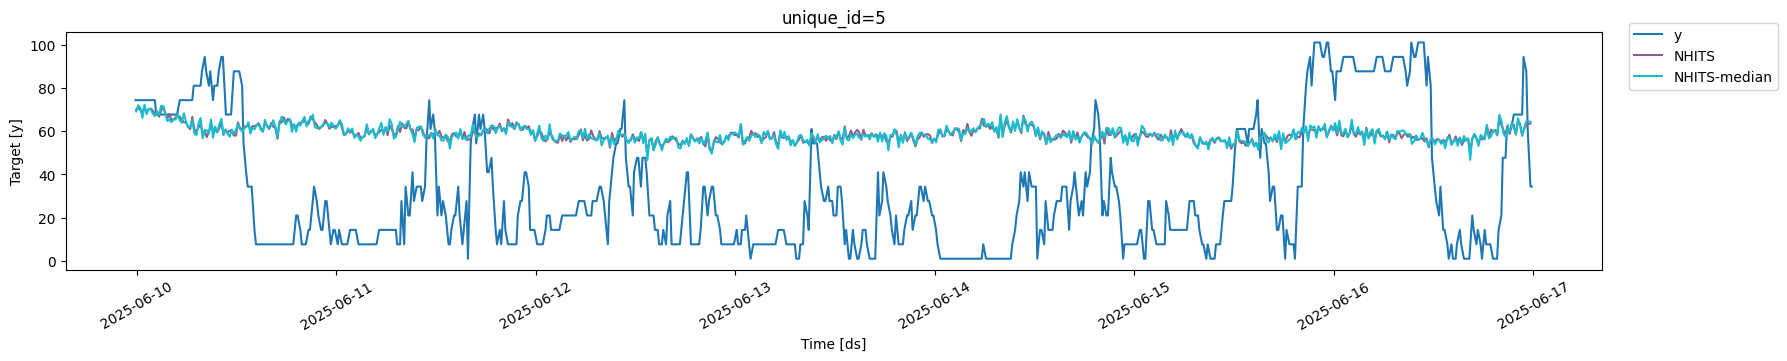

In [20]:
plot_series(ex_test, pred)

In [21]:
# calculate the time difference between each point
time_diff = ex_test["ds"].diff().dt.total_seconds().fillna(0)

# calculate the mean time difference
mean_time_diff = time_diff.mean()
print(f"Mean time difference between points: {mean_time_diff} seconds")
time_diff
# plot the time difference
import plotly.express as px
fig = px.line(
    x=ex_test["ds"],
    y=time_diff,
    title="Time Difference Between Points",
    labels={"x": "Date", "y": "Time Difference (seconds)"},
)
fig.show()

Mean time difference between points: 898.6627043090639 seconds


In [27]:
# there are some points with a time_difference of 600 seconds and some with 1200.
# we want to keep the points with a constant time difference, so we will
# filter the DataFrame to make it 1800 seconds (remove even entries)

filtered_df = df.reset_index(drop=True)
filtered_df = filtered_df[filtered_df.index % 2 == 0].reset_index(drop=True)

# calculate the new time difference
time_diff_filtered = filtered_df["ds"].diff().dt.total_seconds().fillna(0)
# calculate the mean time difference
mean_time_diff_filtered = time_diff_filtered.mean()
print(f"Mean time difference after filtering: {mean_time_diff_filtered} seconds")

filtered_df

Mean time difference after filtering: -0.0750375187593797 seconds


,Direccion,Numero,Activo,Bicis_disponibles,Espacios_libres,Espacios_totales,ticket,fecha_actualizacion,geo_shape,geo_point_2d,...,snapshot_ts,Year,Month,Day,Hour,Minute,unique_id,bikes_percent,ds,y
0,Plaza Poeta Llorente,5,True,2,13,15,False,2024-12-31 23:50:08,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2025-01-01 00:00:03,2024,12,31,23,50,5,13.333333,2024-12-31 23:50:00,14.333333
1,Plaza Poeta Llorente,5,True,2,13,15,False,2025-01-01 00:19:44,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2025-01-01 00:30:02,2025,1,1,0,19,5,13.333333,2025-01-01 00:20:00,14.333333
2,Plaza Poeta Llorente,5,True,2,13,15,False,2025-01-01 00:49:35,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2025-01-01 01:00:03,2025,1,1,0,49,5,13.333333,2025-01-01 00:50:00,14.333333
3,Plaza Poeta Llorente,5,True,2,13,15,False,2025-01-01 01:20:04,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2025-01-01 01:30:02,2025,1,1,1,20,5,13.333333,2025-01-01 01:20:00,14.333333
4,Plaza Poeta Llorente,5,True,2,13,15,False,2025-01-01 01:49:31,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2025-01-01 02:00:02,2025,1,1,1,49,5,13.333333,2025-01-01 01:50:00,14.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,Plaza Poeta Llorente,5,True,1,14,15,False,2024-12-31 21:40:10,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2024-12-31 21:45:02,2024,12,31,21,40,5,6.666667,2024-12-31 21:40:00,7.666667
7992,Plaza Poeta Llorente,5,True,1,14,15,False,2024-12-31 22:09:44,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2024-12-31 22:15:02,2024,12,31,22,9,5,6.666667,2024-12-31 22:10:00,7.666667
7993,Plaza Poeta Llorente,5,True,1,14,15,False,2024-12-31 22:39:14,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2024-12-31 22:45:02,2024,12,31,22,39,5,6.666667,2024-12-31 22:39:00,7.666667
7994,Plaza Poeta Llorente,5,True,1,14,15,False,2024-12-31 23:09:43,"{""coordinates"": [-0.3711403661399108, 39.47689...","39.476895339123786,-0.3711403661399108",...,2024-12-31 23:15:01,2024,12,31,23,9,5,6.666667,2024-12-31 23:10:00,7.666667
